# Exercise 2 - KNN

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot  as plt
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

## Parkinson data

In [4]:
df = pd.read_csv('data/parkinsons_updrs.data')
df.head()

FileNotFoundError: ignored

In [ ]:
df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [ ]:
df.isna().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [ ]:
df.corr()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,-0.030864,0.286851,-0.000882,0.252919,0.253643,0.135448,0.075156,0.120339,0.136474,...,0.142864,0.112950,0.138264,0.173333,0.112949,0.168743,-0.206929,0.147300,0.097464,0.157559
age,-0.030864,1.000000,-0.041602,0.019884,0.273665,0.310290,0.023071,0.035691,0.010255,0.013199,...,0.111130,0.098912,0.089983,0.135238,0.098913,0.007093,-0.104842,0.090208,-0.092870,0.120790
sex,0.286851,-0.041602,1.000000,-0.009805,-0.031205,-0.096559,0.051422,-0.154645,0.076718,0.087995,...,0.056481,0.044937,0.064819,0.023360,0.044938,0.168170,-0.000167,-0.159262,-0.165113,-0.099901
test_time,-0.000882,0.019884,-0.009805,1.000000,0.067918,0.075263,-0.022837,-0.011365,-0.028888,-0.023290,...,-0.030962,-0.029020,-0.036504,-0.039110,-0.029017,-0.026357,0.036545,-0.038887,0.019261,-0.000563
motor_UPDRS,0.252919,0.273665,-0.031205,0.067918,1.000000,0.947231,0.084816,0.050903,0.072684,0.076291,...,0.110076,0.084261,0.092105,0.136560,0.084260,0.074967,-0.157029,0.128607,-0.116242,0.162433
total_UPDRS,0.253643,0.310290,-0.096559,0.075263,0.947231,1.000000,0.074247,0.066927,0.064015,0.063352,...,0.098790,0.079363,0.083467,0.120838,0.079363,0.060952,-0.162117,0.156897,-0.113475,0.156195
Jitter(%),0.135448,0.023071,0.051422,-0.022837,0.084816,0.074247,1.000000,0.865577,0.984181,0.968214,...,0.716704,0.664149,0.694002,0.645965,0.664147,0.825294,-0.675188,0.427128,0.226550,0.721849
Jitter(Abs),0.075156,0.035691,-0.154645,-0.011365,0.050903,0.066927,0.865577,1.000000,0.844626,0.790538,...,0.655871,0.623830,0.621401,0.589998,0.623827,0.699960,-0.706418,0.547100,0.352264,0.787853
Jitter:RAP,0.120339,0.010255,0.076718,-0.028888,0.072684,0.064015,0.984181,0.844626,1.000000,0.947196,...,0.685551,0.650226,0.659831,0.603082,0.650225,0.792373,-0.641473,0.382891,0.214881,0.670652
Jitter:PPQ5,0.136474,0.013199,0.087995,-0.023290,0.076291,0.063352,0.968214,0.790538,0.947196,1.000000,...,0.734591,0.676711,0.734021,0.668413,0.676710,0.864864,-0.662409,0.381503,0.175359,0.663491


In [ ]:
df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [ ]:
y = df["total_UPDRS"]
x = df[['age', 'sex',  'Jitter(%)', 'Shimmer',  'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']]

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y, train_size=0.8, random_state=123)

In [ ]:
# scale data
scaler = StandardScaler()
x_train_sc =  scaler.fit_transform(x_train)
x_test_sc =  scaler.fit_transform(x_test)

In [2]:
def knn_regession(train,test, k, dist = 'euclidean'):
    
    distances = distance.cdist(test, train, dist)

    res = []
    for i in range(len(test)):
        closest_indices =  np.argsort(distances[i,:])[:k]
        res.append(y_train.iloc[closest_indices].mean())

    return res

In [ ]:
predicted = knn_regession(x_train_sc,x_test_sc, 5)

In [ ]:
print(mean_squared_error(y_test, predicted))
print(mean_absolute_error(y_test,predicted))

41.671812815348765
4.462981463829788


In [ ]:
predicted = knn_regession(x_train_sc,x_train_sc, 5)
print(mean_squared_error(y_train, predicted))
print(mean_absolute_error(y_train,predicted))

25.627874286796427
3.370432612765957


Find optimal distance function and number of neighbors using cross validation:

In [ ]:
dist_list = [ 'canberra', 'chebyshev', 'cityblock', 'cosine', 'euclidean', 'hamming', 'jaccard', 'minkowski']
# 'braycurtis', 'dice',, 'jensenshannon', 'kulsinski', 'kulczynski1', 'yule', 'mahalanobis', 'matching', 'correlation', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean'

In [ ]:
from sklearn.model_selection import KFold

def CV(k_cv:int, k_range:range, dist_list:list):

    kf = KFold(n_splits=k_cv)
    
    all_mse = []

    for dist in dist_list:
        for k in k_range:
            err = []
            for train, test in kf.split(x_train):
                
                distances = distance.cdist(x_train.iloc[test], x_train.iloc[train], dist)

                res = []
                for i in range(len(test)):
                    closest_indices =  np.argsort(distances[i,:])[:k]
                    res.append(y_train.iloc[closest_indices].mean())

                err.append(mean_squared_error(y_train.iloc[test], res))
            #print("For k=",k,"and distance=",dist, "- Mean MSE:",np.mean(err))
            all_mse.append(np.mean(err))

    dists = np.repeat(dist_list,len(k_range))
    ks = list(k_range)*len(dist_list)

    zipped= zip(dists,ks)
    indixes = list(zipped)
    result_combination = indixes[np.argmin(all_mse)]

    return print("Best",k_cv,"fold cross-validation results using", result_combination[1],"nearest neighbors and the", result_combination[0],"distance","\nMSE:",np.min(all_mse))

k_range = range(1,20)
CV(5,k_range,dist_list)

Best 5 -fold cross-validation results using k = 16 and the cityblock distance 
MSE: 56.13318926153928


In [ ]:
def k_seq(train,test,k_range, metric,dist):
    all_mse = []
    
    if metric == "MAE":
        metric_func = mean_absolute_error
    elif metric == "MSE":
        metric_func = mean_squared_error

    for k in k_range:
        all_mse.append(metric_func(y_test, knn_regession(train,test,k,dist)))

    best_k_ind = np.argmin(all_mse)
    best_k = k_range[best_k_ind]
    
    c = ["r" if k == best_k else "b" for k in k_range]

    plt.scatter(k_range, all_mse,c = c)
    plt.title('Scatter plot')
    plt.xlabel('k')
    plt.ylabel(metric)
    plt.show()

    return(print("Best k using",dist,"distance:",best_k, "\n",metric,": ",all_mse[best_k_ind]))

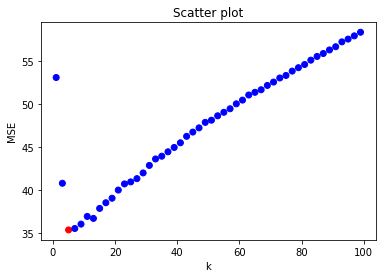

Best k using cityblock distance: 5 
 MSE :  35.375686014479996


In [ ]:
k_seq(x_train_sc,x_test_sc, range(1,100,2),"MSE","cityblock")

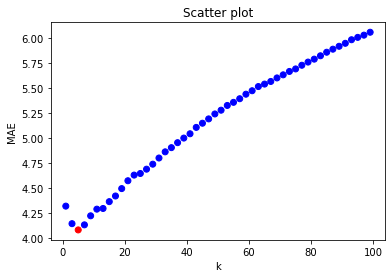

Best k using cityblock distance: 5 
 MAE :  4.08542544680851


In [ ]:
k_seq(x_train_sc,x_test_sc, range(1,100,2),"MAE","cityblock")

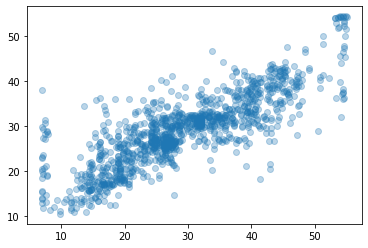

In [ ]:
y_pred = knn_regession(x_train_sc,x_test_sc,16,"cityblock")
plt.scatter(y_test,y_pred,alpha=0.3)
plt.show()

In [ ]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test,y_pred))

38.41100807234155
4.408658882978723


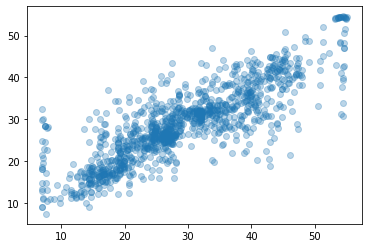

In [ ]:
y_pred = knn_regession(x_train_sc,x_test_sc,5,"cityblock")
plt.scatter(y_test,y_pred,alpha=0.3)
plt.show()

In [ ]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test,y_pred))

35.375686014479996
4.08542544680851


Compare the algorithm to the existing sklearn function:

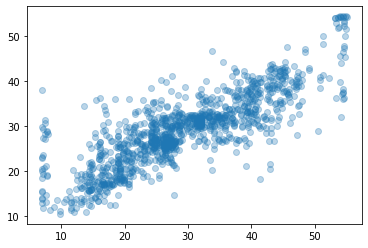

In [ ]:
knn = KNeighborsRegressor(n_neighbors=16, metric="cityblock")
knn_model = knn.fit(x_train_sc,y_train)
knn_prediction = knn_model.predict(x_test_sc)

plt.scatter(y_test,knn_prediction,alpha=0.3)
plt.show()

In [ ]:
print(mean_squared_error(y_test, knn_prediction))
print(mean_absolute_error(y_test,knn_prediction))

38.41100807234156
4.408658882978724


## Immo data

In [76]:
immo = pd.read_csv('/immo_data.csv', engine="python")
immo.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [77]:
immo.shape

(268850, 49)

In [78]:
immo.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [66]:
immo.isna().sum() / len(immo)

regio1                      0.000000
serviceCharge               0.025698
heatingType                 0.166844
telekomTvOffer              0.121328
telekomHybridUploadSpeed    0.832546
newlyConst                  0.000000
balcony                     0.000000
picturecount                0.000000
pricetrend                  0.006814
telekomUploadSpeed          0.124077
totalRent                   0.150705
yearConstructed             0.212182
scoutId                     0.000000
noParkSpaces                0.653889
firingTypes                 0.211880
hasKitchen                  0.000000
geo_bln                     0.000000
cellar                      0.000000
yearConstructedRange        0.212182
baseRent                    0.000000
houseNumber                 0.264155
livingSpace                 0.000000
geo_krs                     0.000000
condition                   0.254748
interiorQual                0.419063
petsAllowed                 0.426160
street                      0.000000
s

In [79]:
immo = immo.dropna(subset= ["totalRent"])
immo.shape

(228333, 49)

In [80]:
immo.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'telekomHybridUploadSpeed', 'newlyConst', 'balcony', 'picturecount',
       'pricetrend', 'telekomUploadSpeed', 'totalRent', 'yearConstructed',
       'scoutId', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln',
       'cellar', 'yearConstructedRange', 'baseRent', 'houseNumber',
       'livingSpace', 'geo_krs', 'condition', 'interiorQual', 'petsAllowed',
       'street', 'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat',
       'geo_plz', 'noRooms', 'thermalChar', 'floor', 'numberOfFloors',
       'noRoomsRange', 'garden', 'livingSpaceRange', 'regio2', 'regio3',
       'description', 'facilities', 'heatingCosts', 'energyEfficiencyClass',
       'lastRefurbish', 'electricityBasePrice', 'electricityKwhPrice', 'date'],
      dtype='object')

In [ ]:
immo["heatingType"].value_counts()

central_heating                   128977
district_heating                   24808
gas_heating                        19955
self_contained_central_heating     19087
floor_heating                      17697
oil_heating                         5042
heat_pump                           2737
combined_heat_and_power_plant       1978
night_storage_heater                1341
wood_pellet_heating                  961
electric_heating                     901
stove_heating                        344
solar_heating                        166
Name: heatingType, dtype: int64

In [ ]:

immo["telekomTvOffer"].value_counts()

ONE_YEAR_FREE    227632
NONE               4957
ON_DEMAND          3642
Name: telekomTvOffer, dtype: int64

In [ ]:
immo["condition"].value_counts()

well_kept                             66591
refurbished                           26964
fully_renovated                       26368
first_time_use                        21959
mint_condition                        21938
modernized                            17226
first_time_use_after_refurbishment    15699
negotiable                             2240
need_of_renovation                     1372
ripe_for_demolition                       4
Name: condition, dtype: int64

In [ ]:
immo["regio1"].value_counts()

Nordrhein_Westfalen       62863
Sachsen                   58154
Bayern                    21609
Sachsen_Anhalt            20124
Hessen                    17845
Niedersachsen             16593
Baden_Württemberg         16091
Berlin                    10406
Thüringen                  8388
Rheinland_Pfalz            8368
Brandenburg                6954
Schleswig_Holstein         6668
Mecklenburg_Vorpommern     6634
Hamburg                    3759
Bremen                     2965
Saarland                   1429
Name: regio1, dtype: int64

In [17]:
immo["balcony"].value_counts()

True     3079
False    1953
Name: balcony, dtype: int64

In [81]:
num_cols = ['serviceCharge','picturecount','pricetrend','yearConstructed','noParkSpaces','baseRent','livingSpace','noRooms','thermalChar','numberOfFloors']
cat_cols = ['regio1','heatingType','telekomTvOffer','firingTypes','condition','interiorQual','petsAllowed','typeOfFlat']
binary_cols = ['newlyConst','balcony','hasKitchen','cellar','lift','garden']

In [82]:
immo[num_cols] = immo[num_cols].fillna(0)
immo[cat_cols] = immo[cat_cols].fillna("unknown")

In [83]:
cols = num_cols+cat_cols+binary_cols

In [84]:
for col in binary_cols:
  immo[col] = immo[col]*1

In [85]:
immo[binary_cols]

,newlyConst,balcony,hasKitchen,cellar,lift,garden
0,0,0,0,1,0,1
2,1,1,0,1,1,0
4,0,1,0,0,0,0
6,0,0,0,1,0,1
7,0,1,0,1,0,0
...,...,...,...,...,...,...
268844,0,0,0,0,0,0
268845,0,1,0,1,0,0
268846,0,1,1,0,0,0
268847,0,1,0,1,0,1


In [86]:
x = immo[cols]
y= immo['totalRent']

In [87]:
x.columns

Index(['serviceCharge', 'picturecount', 'pricetrend', 'yearConstructed',
       'noParkSpaces', 'baseRent', 'livingSpace', 'noRooms', 'thermalChar',
       'numberOfFloors', 'regio1', 'heatingType', 'telekomTvOffer',
       'firingTypes', 'condition', 'interiorQual', 'petsAllowed', 'typeOfFlat',
       'newlyConst', 'balcony', 'hasKitchen', 'cellar', 'lift', 'garden'],
      dtype='object')

In [88]:
# encode categorical variables
oh = OneHotEncoder(sparse=False)
xoh = oh.fit_transform(x[cat_cols])
xoh = pd.DataFrame(xoh,columns = oh.get_feature_names_out())

In [92]:
#x = pd.concat([xoh, immo[num_cols+binary_cols]],axis=1)

In [93]:
#x.shape

(262560, 201)

In [94]:
x = pd.merge(xoh.reset_index(drop=True),immo[num_cols+binary_cols].reset_index(drop=True), left_index=True, right_index=True)

In [95]:
x.shape

(228333, 201)

In [96]:
x_train,x_test,y_train,y_test= train_test_split(x,y, train_size=0.8, random_state=123)

In [97]:
column_transformer = make_column_transformer(
    #(OneHotEncoder(sparse=False), cat_cols),
    (StandardScaler(), num_cols),
    remainder='passthrough')

X_train = column_transformer.fit_transform(x_train)


In [98]:
X_train.shape

(182666, 201)

In [99]:
#from github
from sklearn.pipeline import Pipeline

def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []
    for transformer_in_columns in column_transformer.transformers_[:-1]:#the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1],Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names_out()
        except AttributeError: # if no 'get_feature_names' function, use raw column name
            names = raw_col_name
        if isinstance(names,np.ndarray): # eg.
            col_name += names.tolist()
        elif isinstance(names,list):
            col_name += names    
        elif isinstance(names,str):
            col_name.append(names)
    return col_name
  

In [100]:
x_train = pd.DataFrame(data=X_train, columns=get_column_names_from_ColumnTransformer(column_transformer)+list(xoh.columns)+binary_cols)

In [101]:
x_test = column_transformer.fit_transform(x_test)
x_test = pd.DataFrame(data=x_test, columns=get_column_names_from_ColumnTransformer(column_transformer)+list(xoh.columns)+binary_cols)

In [102]:
x_test.shape

(45667, 201)

In [ ]:
y_pred = knn_regession(x_train,x_test,5,"euclidean")
plt.scatter(y_test,y_pred,alpha=0.3)
plt.show()

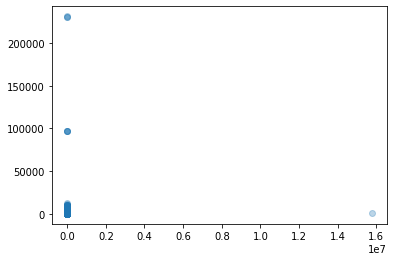

In [103]:
knn = KNeighborsRegressor(n_neighbors=5, metric="euclidean")
knn_model = knn.fit(x_train,y_train)
knn_prediction = knn_model.predict(x_test)

plt.scatter(y_test,knn_prediction,alpha=0.3)
plt.show()